In [153]:
import math
import numpy as np
import matplotlib.pyplot as plt

def lineAColor(x1, y1, x2, y2, rysowac=False, kolor_linii=[0, 0, 0], kolor_tla=[255, 255, 255]):
    assert isinstance(kolor_linii, list)
    assert x1 < 100
    assert x2 < 100
    assert y1 < 100
    assert y2 < 100
    
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    data = np.zeros((100, 100, 3), dtype=np.uint8)
    data[:,:] = kolor_tla
    
    delta_y = (y2 - y1)
    delta_x = (x2 - x1)
    
    m = delta_y / delta_x
    
    c = y1

    
    A = y2 - y1
    B = x1 - x2
    C = x1*y2 - x2*y1
    print(A, B, C)
    
    for x in range(x1, x2):
        y = math.floor(m * (x - x1) + c)
        data[x, y, 0] = kolor_linii[0]
        data[x, y, 1] = kolor_linii[1]
        data[x, y, 2] = kolor_linii[2]
        
        ###
        px = x
        py = y-1

        d = abs(A * px + B * py + C) / math.sqrt(A**2 + B**2)
        #print(d)
        
        if d <= 1:
            kolor_piksela = np.array(kolor_linii) * (1-d) + np.array(kolor_tla) * d
            #kolor_piksela = np.floor(kolor_piksela)
            data[x, y+1, 0] = kolor_piksela[0]
            data[x, y+1, 1] = kolor_piksela[1]
            data[x, y+1, 2] = kolor_piksela[2]
        ###
        
    if rysowac is True:
        print('x0:', x1, 'y0:', y1, 'xk:', x2, 'yk:', y2)
        plt.imshow(data, interpolation='none', aspect=1)
        plt.show()
    
    return data


48 -78 -60
x0: 2 y0: 2 xk: 80 yk: 50


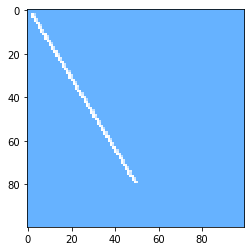

47 -48 -50
x0: 2 y0: 3 xk: 50 yk: 50


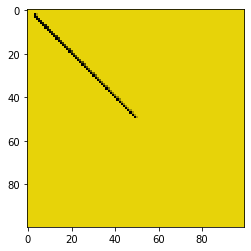

array([[[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]],

       [[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]],

       [[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]],

       ...,

       [[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]],

       [[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]],

       [[231, 211,   9],
        [231, 211,   9],
        [231, 211,   9],
        ...,
        [231, 211,   9],
        [231, 211,   9],
        [231, 211,   9]]

In [154]:
lineAColor(80, 50, 2, 2, True, [255, 255, 255], [102, 178, 255])
lineAColor(2, 3, 50, 50, True, [0, 0, 0], [231, 211, 9])

In [92]:
def liniaBresenham(x0, y0, xk, yk, rysowac=False, kolor_linii=[0, 0, 0], kolor_tla=[255, 255, 255]):
    assert x0 < 100
    assert xk < 100
    assert y0 < 100
    assert yk < 100
    
    dx = xk - x0
    dy = yk - y0
    
    data = np.zeros((100, 100, 3), dtype=np.uint8)
    data[:,:] = kolor_tla
    
    if abs(dx) > abs(dy):
        if x0 > xk:
            x0, xk = xk, x0
            y0, yk = yk, y0

        dx = xk - x0
        dy = yk - y0

        D = 2*dy - dx
        y = y0

        A = yk - y0
        B = x0 - xk
        C = x0*yk - xk*y0
        print(A, B, C)
    
        for x in range(x0, xk):
            data[y, x, 0] = 0
            data[y, x, 1] = 0
            data[y, x, 2] = 0
            
            ###
            px = x
            py = y-1

            d = abs(A * px + B * py + C) / math.sqrt(A**2 + B**2)
            #print(d)
        
            if d <= 1:
                kolor_piksela = np.array(kolor_linii) * (1-d) + np.array(kolor_tla) * d
                data[py, px, 0] = kolor_piksela[0]
                data[py, px, 1] = kolor_piksela[1]
                data[py, px, 2] = kolor_piksela[2]
            ###

            if D > 0:
                y = y + np.sign(dy)
                D = D - 2*abs(dx)

            D = D + 2*abs(dy)

    else:

        if y0 > yk:
            xk, x0 = x0, xk
            yk, y0 = y0, yk
        
        dx = xk - x0
        dy = yk - y0


        D = 2*dx - dy
        x = x0
        
        A = yk - y0
        B = x0 - xk
        C = x0*yk - xk*y0
        print(A, B, C)

        for y in range(y0, yk):
            data[y, x, 0] = 0
            data[y, x, 1] = 0
            data[y, x, 2] = 0
            
            px = x
            py = y-1

            d = abs(A * px + B * py + C) / math.sqrt(A**2 + B**2)
            #print(d)
            
            ###
            if d <= 1:
                kolor_piksela = np.array(kolor_linii) * (1-d) + np.array(kolor_tla) * d
                data[py, px, 0] = kolor_piksela[0]
                data[py, px, 1] = kolor_piksela[1]
                data[py, px, 2] = kolor_piksela[2]
            ###
            
            if D > 0:
                x = x + np.sign(dx)
                D = D - 2*abs(dy)

            D = D + 2*abs(dx)
    
    if rysowac is True:
        print('x0:', x0, 'y0:', y0, 'xk:', xk, 'yk:', yk)
        plt.imshow(data, interpolation='none', aspect=1)
        plt.show()
        
        plt.imsave('test1.png', data, format='png') #zapis obrazu
        
    return data

78 -78 0
x0: 2 y0: 2 xk: 80 yk: 80


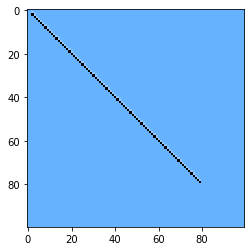

48 -78 -60
x0: 2 y0: 2 xk: 80 yk: 50


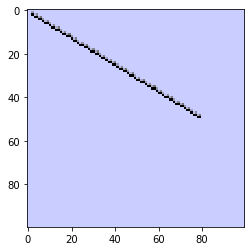

47 -28 10
x0: 2 y0: 3 xk: 30 yk: 50


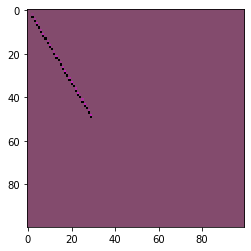

array([[[131,  75, 109],
        [131,  75, 109],
        [131,  75, 109],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]],

       [[131,  75, 109],
        [131,  75, 109],
        [131,  75, 109],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]],

       [[131,  75, 109],
        [131,  75, 109],
        [146,  65, 126],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]],

       ...,

       [[131,  75, 109],
        [131,  75, 109],
        [131,  75, 109],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]],

       [[131,  75, 109],
        [131,  75, 109],
        [131,  75, 109],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]],

       [[131,  75, 109],
        [131,  75, 109],
        [131,  75, 109],
        ...,
        [131,  75, 109],
        [131,  75, 109],
        [131,  75, 109]]

In [101]:
liniaBresenham(80, 80, 2, 2, True, [255, 255, 255], [102, 178, 255])
liniaBresenham(80, 50, 2, 2, True, [110, 110, 110], [202, 205, 255])
liniaBresenham(2, 3, 30, 50, True, [255, 255, 255], [131, 331, 109])